# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [332]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [333]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Use shape to get  number Rows and Columns 
df.shape

(1898, 9)

#### Observations:
In the DataFrame there are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- there is 1898 rows and ther is no missing data it all rows
- there are 3 data types include float , intiger and object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Use isnull() to find out the missing data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- Ther isno missing data (null) in the FoodHub data frame

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [57]:
# Use describe() to find out the statistical information. Then transpose the result 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


# Observations:
- food_prepration_time has min of 20.00 max of 35.00 and average of 27.4
- cost_of_the_order has  a rang  of 4.47 to 35.41, with average 16.5 
- food_prepration_time has  range of 20.00 to 35.00  with avarage 27.4
- delivery_time has  , has range of 15 to 33.00 with avarage of 24.2


### **Question 5:** How many orders are not rated? [1 mark]

In [26]:
# Use len() to find out the number of 'Not given' in rating column
len(df[df['rating']=='Not given'])

736

#### Observations:
- The rating column has 736 rows that has not rated by customer 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [31]:
# To get unique number of values in each column
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [32]:
# Total number of unique values in the data frame
df.nunique().sum()

3643

## Customer ID and Order ID

In [300]:
# Number of unique customer id
df["customer_id"].nunique()

1200

In [301]:
# Number of unique order id
df['order_id'].nunique()

1898

In [84]:
# To find out top cusomer ID in number of orders
df1=df.groupby(['customer_id'])[['order_id']].nunique().reset_index()
df2=df1.sort_values(by='order_id',ascending=False).head()
df2.rename(columns={'order_id':'number_of_order'},inplace=True )
df2

,customer_id,number_of_orders
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7


In [149]:
# Top customer in total cost
df3=df.groupby(['customer_id'])[['cost_of_the_order']].sum().reset_index()
df4=df1.sort_values(by='cost_of_the_order',ascending=False).head()
df4.rename(columns={'cost_of_the_order':'total_cost',},inplace=True)
df4

,customer_id,total_cost
116,52832,225.80
839,250494,183.83
84,47440,158.18
870,276192,146.46
333,83287,139.31


## Restaurant Name 

In [4]:
# Number of restaurant
df['restaurant_name'].nunique()

178

In [5]:
# List of restaurant
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [104]:
# dataframe for restaurant name and delivery time
temp=df.groupby(['restaurant_name'])['delivery_time'].mean().reset_index()
# Top resdtaurant in delivery time 
temp.sort_values('delivery_time', ascending=False).head()

,restaurant_name,delivery_time
132,Sarabeth's West,33.0
148,Taro Sushi,32.0
68,Haru Gramercy Park,32.0
58,Frank Restaurant,31.0
64,Haandi,30.5


In [329]:
# lowest delivery time 
temp.sort_values('delivery_time', ascending=False).tail()

,restaurant_name,delivery_time
61,Galli Restaurant,16.0
152,The MasalaWala,15.0
110,Paul & Jimmy's,15.0
71,Hibino,15.0
60,Gaia Italian Cafe,15.0


In [113]:
# 5 top resaurant in geting order 
df_top_restaurant=df.groupby(['restaurant_name'])[['order_id','customer_id']].nunique().sort_values(by='order_id',ascending=False).reset_index()
df_top_restaurant.rename(columns={'order_id':'number_of_order','customer_id':'number_of_customer'},inplace=True)
df_top_restaurant.head()

,restaurant_name,number_of_order,number_of_customer
0,Shake Shack,219,170
1,The Meatball Shop,132,102
2,Blue Ribbon Sushi,119,75
3,Blue Ribbon Fried Chicken,96,68
4,Parm,68,56


In [114]:
# find the list of the top resaurant   in number of  order
# df_top_restaurant already calculated
top_restaurent= df_top_restaurant.head().restaurant_name.unique()
top_restaurent

array(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'], dtype=object)

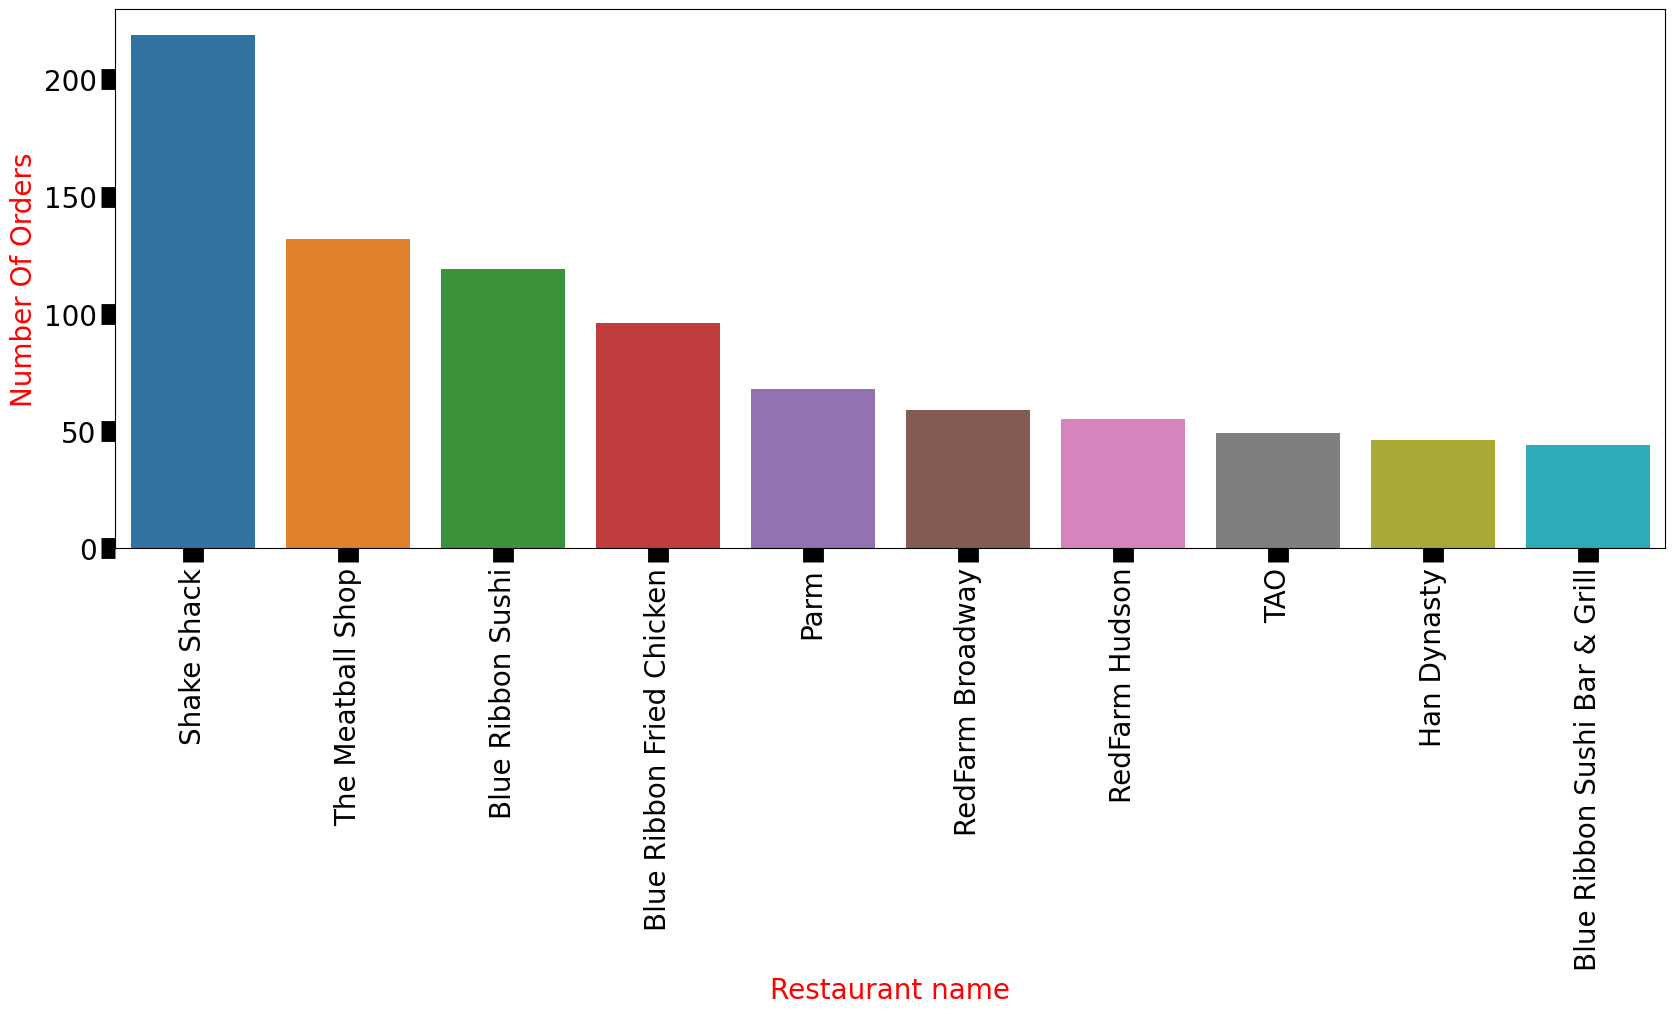

In [8]:
#Plot histogram for restaurant name and number of the order
plt.figure(figsize=(20,7))
ax=sns.barplot(data=df_top_restaurant.head(10), x='restaurant_name',y='number_of_order')
# Channge paramiters of the plot
plt.xticks(rotation=90);
ax.tick_params(axis='both',labelsize=20,length=10,width=15 )
plt.xlabel('Restaurant name', fontsize=20 , color='r')
plt.ylabel('Number Of Orders', fontsize=20, color='r');


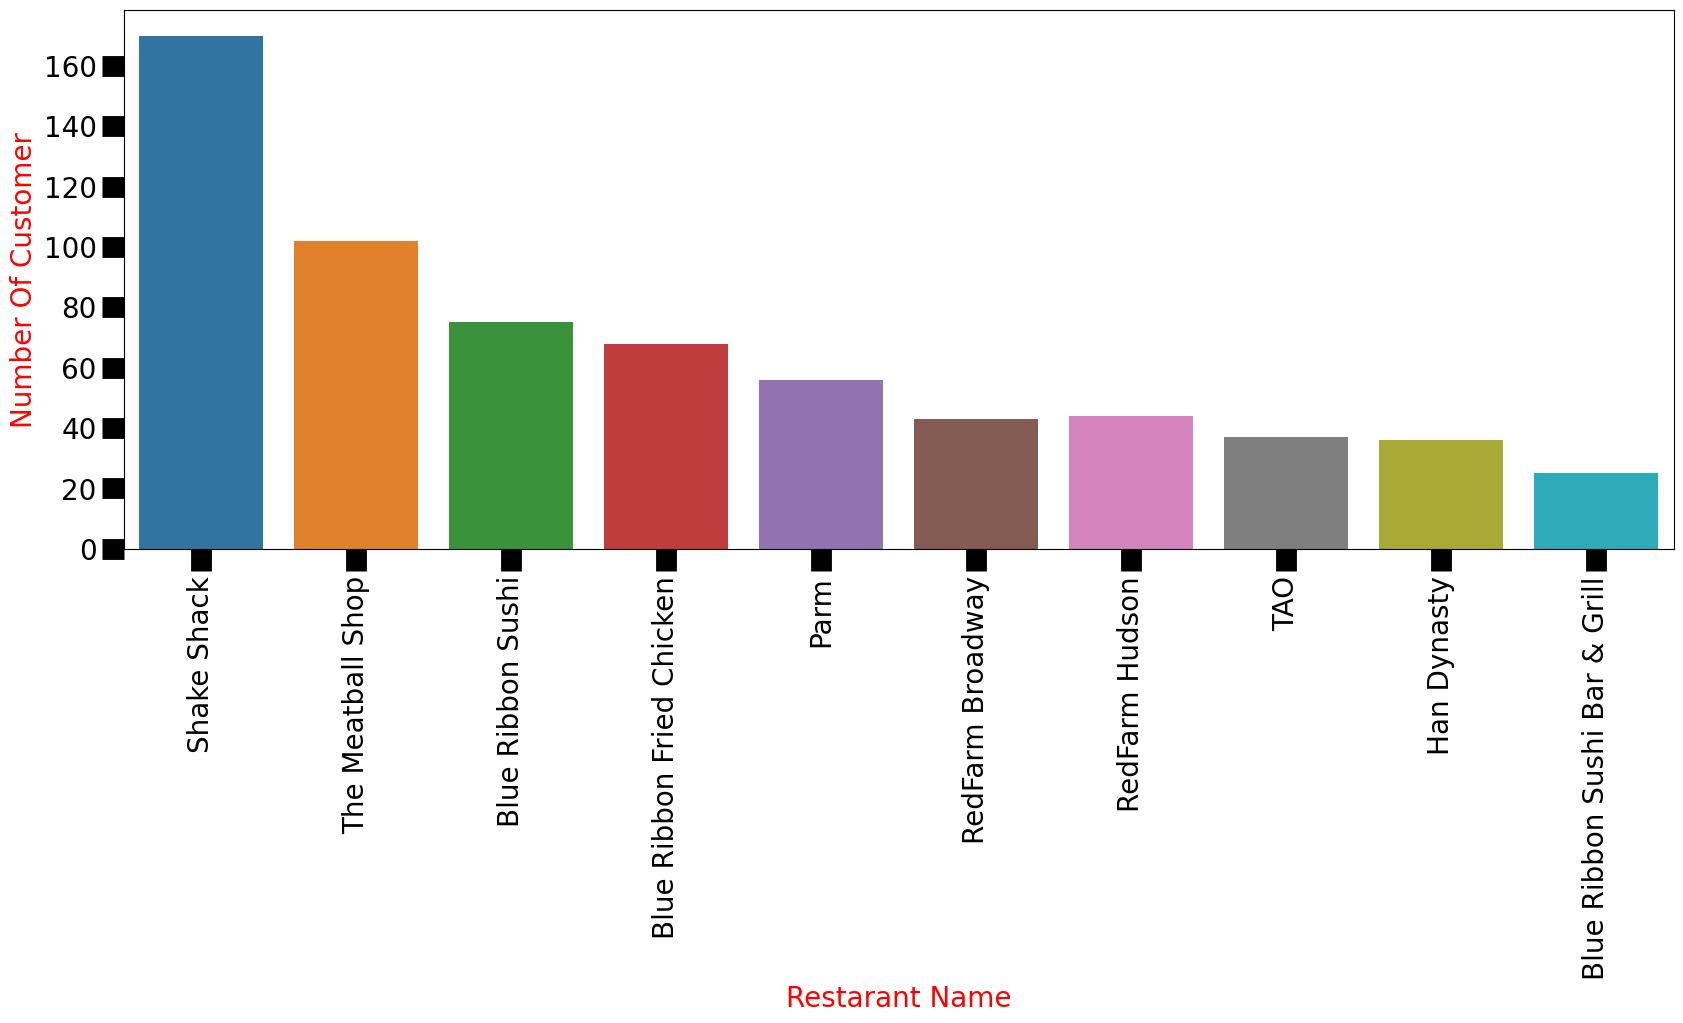

In [97]:
# plot histogram for restaurant name and number of the customer in descending order 

plt.figure(figsize=(20,7))
ax=sns.barplot(data=df_top_restaurant.head(10), x='restaurant_name',y='number_of_customer')
# Change plot paramitters
plt.xticks(rotation=90);
ax.tick_params(axis='both',labelsize=20,length=16,width=15 )
plt.xlabel('Restarant Name', fontsize=20, color='r')
plt.ylabel('Number Of Customer', fontsize=20, color='r');

In [115]:
# Total delivery time
df_total_time=df['delivery_time'].sum()
df_total_time

45859

In [120]:
# number_of_order number_of_customer for top restaurant
df_top_restaurant.head(5).sum()


restaurant_name       Shake ShackThe Meatball ShopBlue Ribbon SushiB...
number_of_order                                                     634
number_of_customer                                                  471
dtype: object

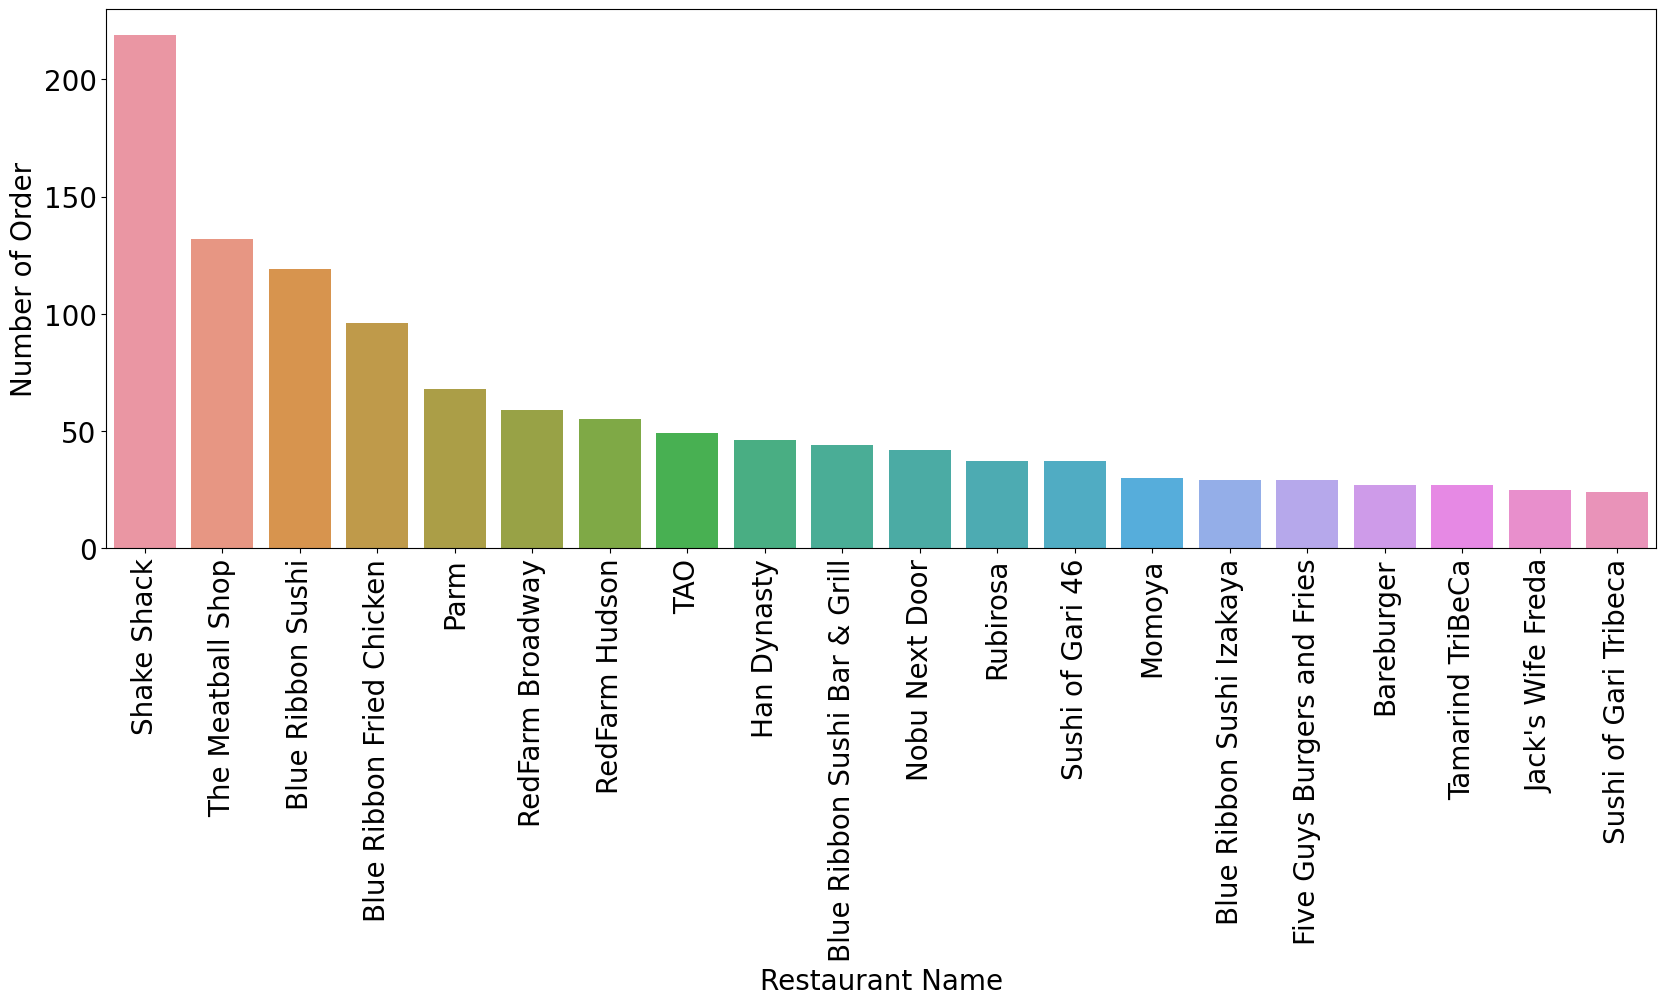

In [157]:
# Plot histogram of 20 rsaurant  to number of orders in discending order

plt.figure(figsize=(20,7))
ax=sns.barplot(data=df_top_restaurant.head(20), x='restaurant_name', y='number_of_order');
plt.xticks(rotation=90);
plt.xlabel('Restaurant Name',fontsize=20)
plt.ylabel('Number of Order',fontsize=20)
ax.tick_params(axis='both',labelsize=20 )


In [136]:
df[:5]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# Cuisine Type

In [122]:
# Unique cuisine type
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [121]:
# Number of cuisine
df['cuisine_type'].nunique()

14

In [325]:
# Average cuisine type on weekday and weekend
df.groupby(['cuisine_type','day_of_the_week'])[['cost_of_the_order']].mean()


cost_of_the_order
cuisine_type   day_of_the_week                   
American       Weekday                  15.308343
               Weekend                  16.731735
Chinese        Weekday                  17.147692
               Weekend                  16.036442
French         Weekday                  20.866000
               Weekend                  19.381538
Indian         Weekday                  17.162500
               Weekend                  16.800816
Italian        Weekday                  16.890110
               Weekend                  16.211449
Japanese       Weekday                  16.368074
               Weekend                  16.278925
Korean         Weekday                  12.180000
               Weekend                  14.332727
Mediterranean  Weekday                  14.040000
               Weekend                  16.102500
Mexican        Weekday                  16.555833
               Weekend                  17.103962
Middle Eastern Weekday                  19.832941
               Weekend                  18.282812
Southern       Weekday                  19.226667
               Weekend                  19.340909
Spanish        Weekday                  12.130000
               Weekend                  19.618182
Thai           Weekday                  15.462500
               Weekend                  20.206667
Vietnamese     Weekday                  11.916667
               Weekend                  13.607500

In [123]:
# Number of  unique cuisine type
df_cuisine=df['cuisine_type'].value_counts().reset_index()
df_cuisine

,cuisine_type,count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


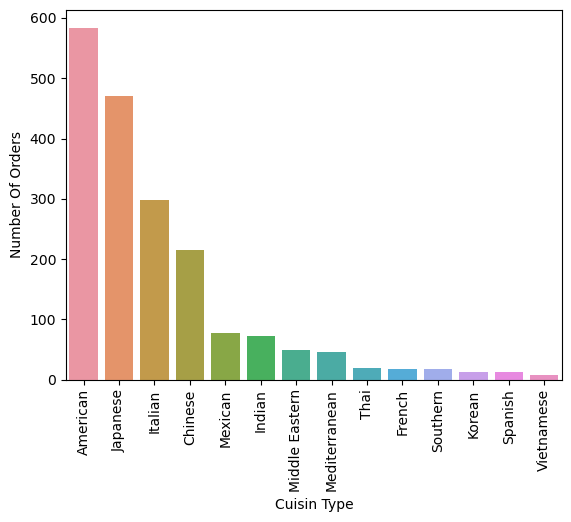

In [131]:

# plot for number of unique ordr per cuisine
sns.barplot(data=df_cuisine,x='cuisine_type',y='count')
ax.tick_params(axis='both',labelsize=20,length=16,width=15 )
plt.xlabel('Cuisin Type', fontsize=10)
plt.ylabel('Number Of Orders', fontsize=10)
plt.xticks(rotation=90);

In [76]:
# Find out the top resaurant in geting order on Weekdays 
df5=df[df['day_of_the_week']=='Weekday']
df6=df5['cuisine_type'].value_counts().reset_index()
df6.rename(columns={'count':'number_of_order_weekeday'},inplace=True)

# Find out the top resaurant in geting order on Weekends 
df7=df[df['day_of_the_week']=='Weekend']
df8=df7['cuisine_type'].value_counts().reset_index()
df8.rename(columns={'count':'number_of_order_weekend'},inplace=True)



In [195]:
# Combine two dataframe 
combined_df = pd.concat([df6, df8], axis=1)
combined_df


,cuisine_type,number_of_order_weekeday,cuisine_type,number_of_order_weekend
0,American,169,American,415
1,Japanese,135,Japanese,335
2,Italian,91,Italian,207
3,Chinese,52,Chinese,163
4,Mexican,24,Mexican,53
5,Indian,24,Indian,49
6,Middle Eastern,17,Mediterranean,32
7,Mediterranean,14,Middle Eastern,32
8,Southern,6,Thai,15
9,French,5,French,13


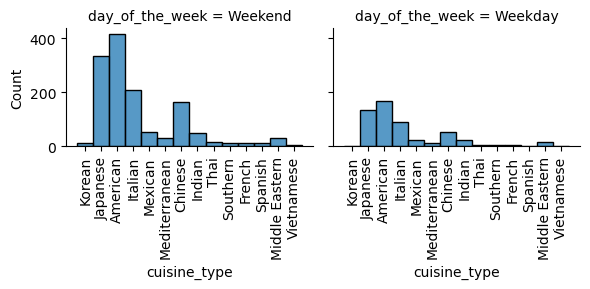

In [102]:
# Plot cusin type during weekend and weekday 
g=sns.FacetGrid(data=df,col='day_of_the_week')
g.map(sns.histplot, 'cuisine_type')
g.tick_params(axis='x', rotation=90)
plt.xticks(rotation=90);

plt.tight_layout()
plt.show()

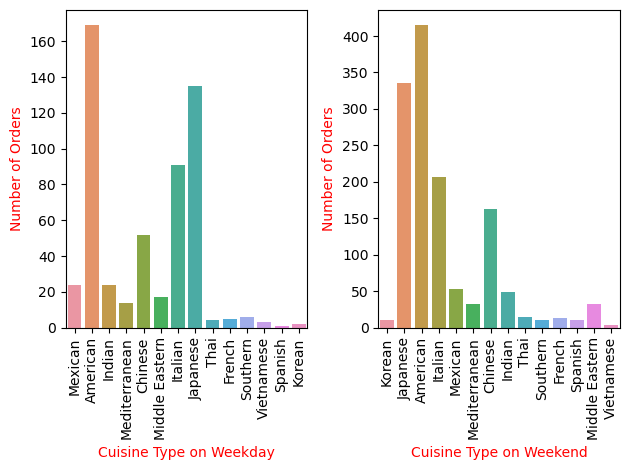

In [196]:
# Cuisin type and day of the week in two plot for comperison
plt.subplot(1,2,1)
df5=df[df['day_of_the_week']=='Weekday']
sns.countplot(data=df5,x='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type on Weekday',color='r')
plt.ylabel('Number of Orders',color='r')

plt.subplot(1,2,2)
df7=df[df['day_of_the_week']=='Weekend']
sns.countplot(data=df7,x='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type on Weekend',color='r')
plt.ylabel('Number of Orders',color='r')

plt.tight_layout()
plt.show()


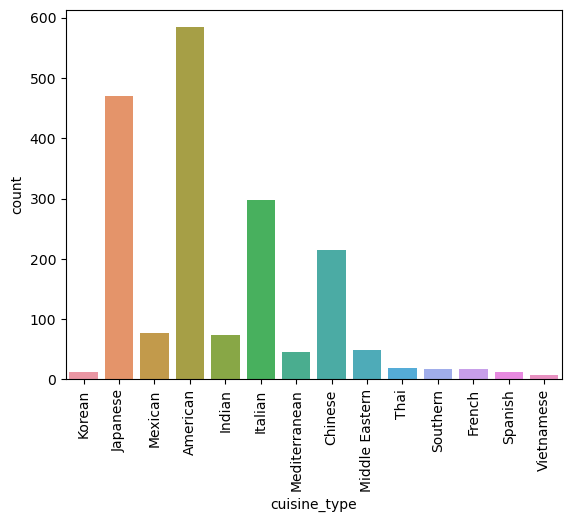

In [141]:
# countplot for cuisine type.

sns.countplot(data = df, x = 'cuisine_type') 
plt.xticks(rotation=90);

# Cost OF The Order

In [208]:
# describtion of cost of the order
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [354]:
# number of unique order
df['cost_of_the_order'].nunique()

312

In [335]:
#  Total cost of the orders
df_total_cost=df['cost_of_the_order'].sum()
df_total_cost

31314.82

In [336]:
# Total cost of order on weekday and weekend
df_cost=df.groupby(['day_of_the_week'])['cost_of_the_order'].sum().reset_index()
df_cost['cost_ratio']=df_cost['cost_of_the_order']/df_total_cost
df_cost                                

,day_of_the_week,cost_of_the_order,cost_ratio
0,Weekday,8922.22,0.28492
1,Weekend,22392.60,0.71508


In [355]:
# Classify the days of the week based on the average order cost.”
df.groupby(['day_of_the_week'])['cost_of_the_order'].mean().reset_index().sort_values(by='cost_of_the_order',ascending=False)

,day_of_the_week,cost_of_the_order
1,Weekend,16.574833
0,Weekday,16.311188


In [356]:
# categorize the restaurant name 
df.groupby(['restaurant_name'])['cost_of_the_order'].mean().reset_index().sort_values(by='cost_of_the_order',ascending=False)

,restaurant_name,cost_of_the_order
83,Kambi Ramen House,32.930
55,Emporio,31.430
15,Bhatti Indian Grill,31.115
68,Haru Gramercy Park,29.830
93,Lucky Strike,29.250
...,...,...
96,Market Table,6.790
164,Wa Jeal,6.740
39,Cipriani Le Specialita,5.920
17,Big Wong Restaurant _¤¾Ñ¼,5.920


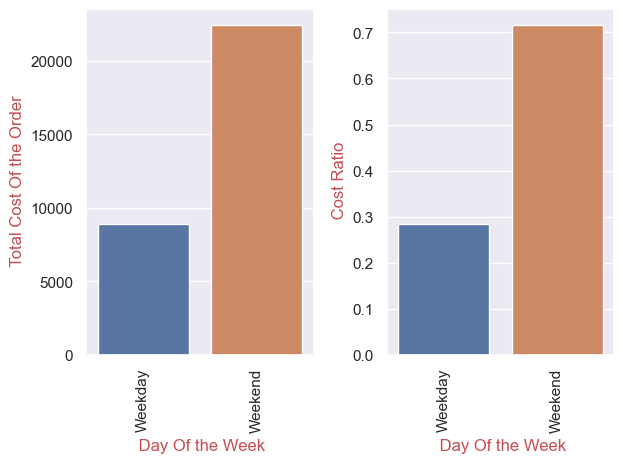

In [337]:
# plot for cost of order on weekday and weekend
plt.subplot(1,2,1)
sns.barplot(data=df_cost,x='day_of_the_week',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.xlabel(' Day Of the Week',color='r')
plt.ylabel(' Total Cost Of the Order',color='r')

# plot for cost ratio of order on weekday and weekend
plt.subplot(1,2,2)
sns.barplot(data=df_cost,x='day_of_the_week', y='cost_ratio')
plt.xticks(rotation=90)
plt.xlabel(' Day Of the Week',color='r')
plt.ylabel(' Cost Ratio',color='r')

plt.tight_layout()
plt.show()

In [133]:
# Average order cost on weekday and weekend
df_cost_day=df.groupby(['day_of_the_week'])['cost_of_the_order'].mean().reset_index().sort_values(by='cost_of_the_order',ascending=False)
df_cost_day

,day_of_the_week,cost_of_the_order
1,Weekend,16.574833
0,Weekday,16.311188


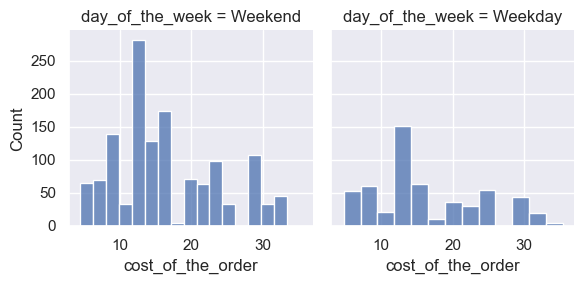

In [370]:
#Plot  to compaair order cost in weekday and weekend
g=sns.FacetGrid(data=df,col='day_of_the_week')
g.map(sns.histplot,'cost_of_the_order')
plt.tight_layout()

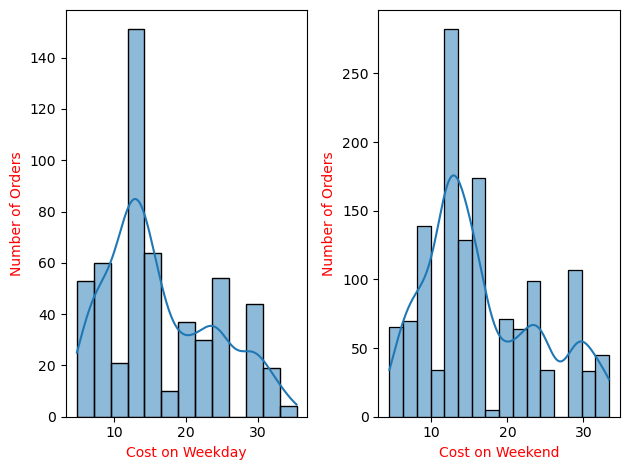

In [7]:
#Plot  to compaair order cost in weekday and weekend
        #Weekday
plt.subplot(1,2,1)
df5=df[df['day_of_the_week']=='Weekday']
sns.histplot(data=df5,x='cost_of_the_order',kde=True)

plt.xlabel('Cost on Weekday',color='r')
plt.ylabel('Number of Orders',color='r')
         #Weekend
plt.subplot(1,2,2)
df7=df[df['day_of_the_week']=='Weekend']
sns.histplot(data=df7,x='cost_of_the_order',kde=True)

plt.xlabel('Cost on Weekend',color='r')
plt.ylabel('Number of Orders',color='r')

plt.tight_layout()
plt.show()

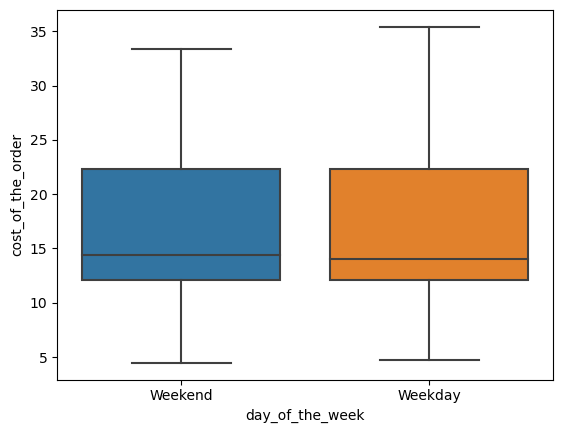

In [134]:
# BoxPlot to compaire order cost in weekday and weekend
sns.boxplot(data=df,y='cost_of_the_order',x='day_of_the_week');

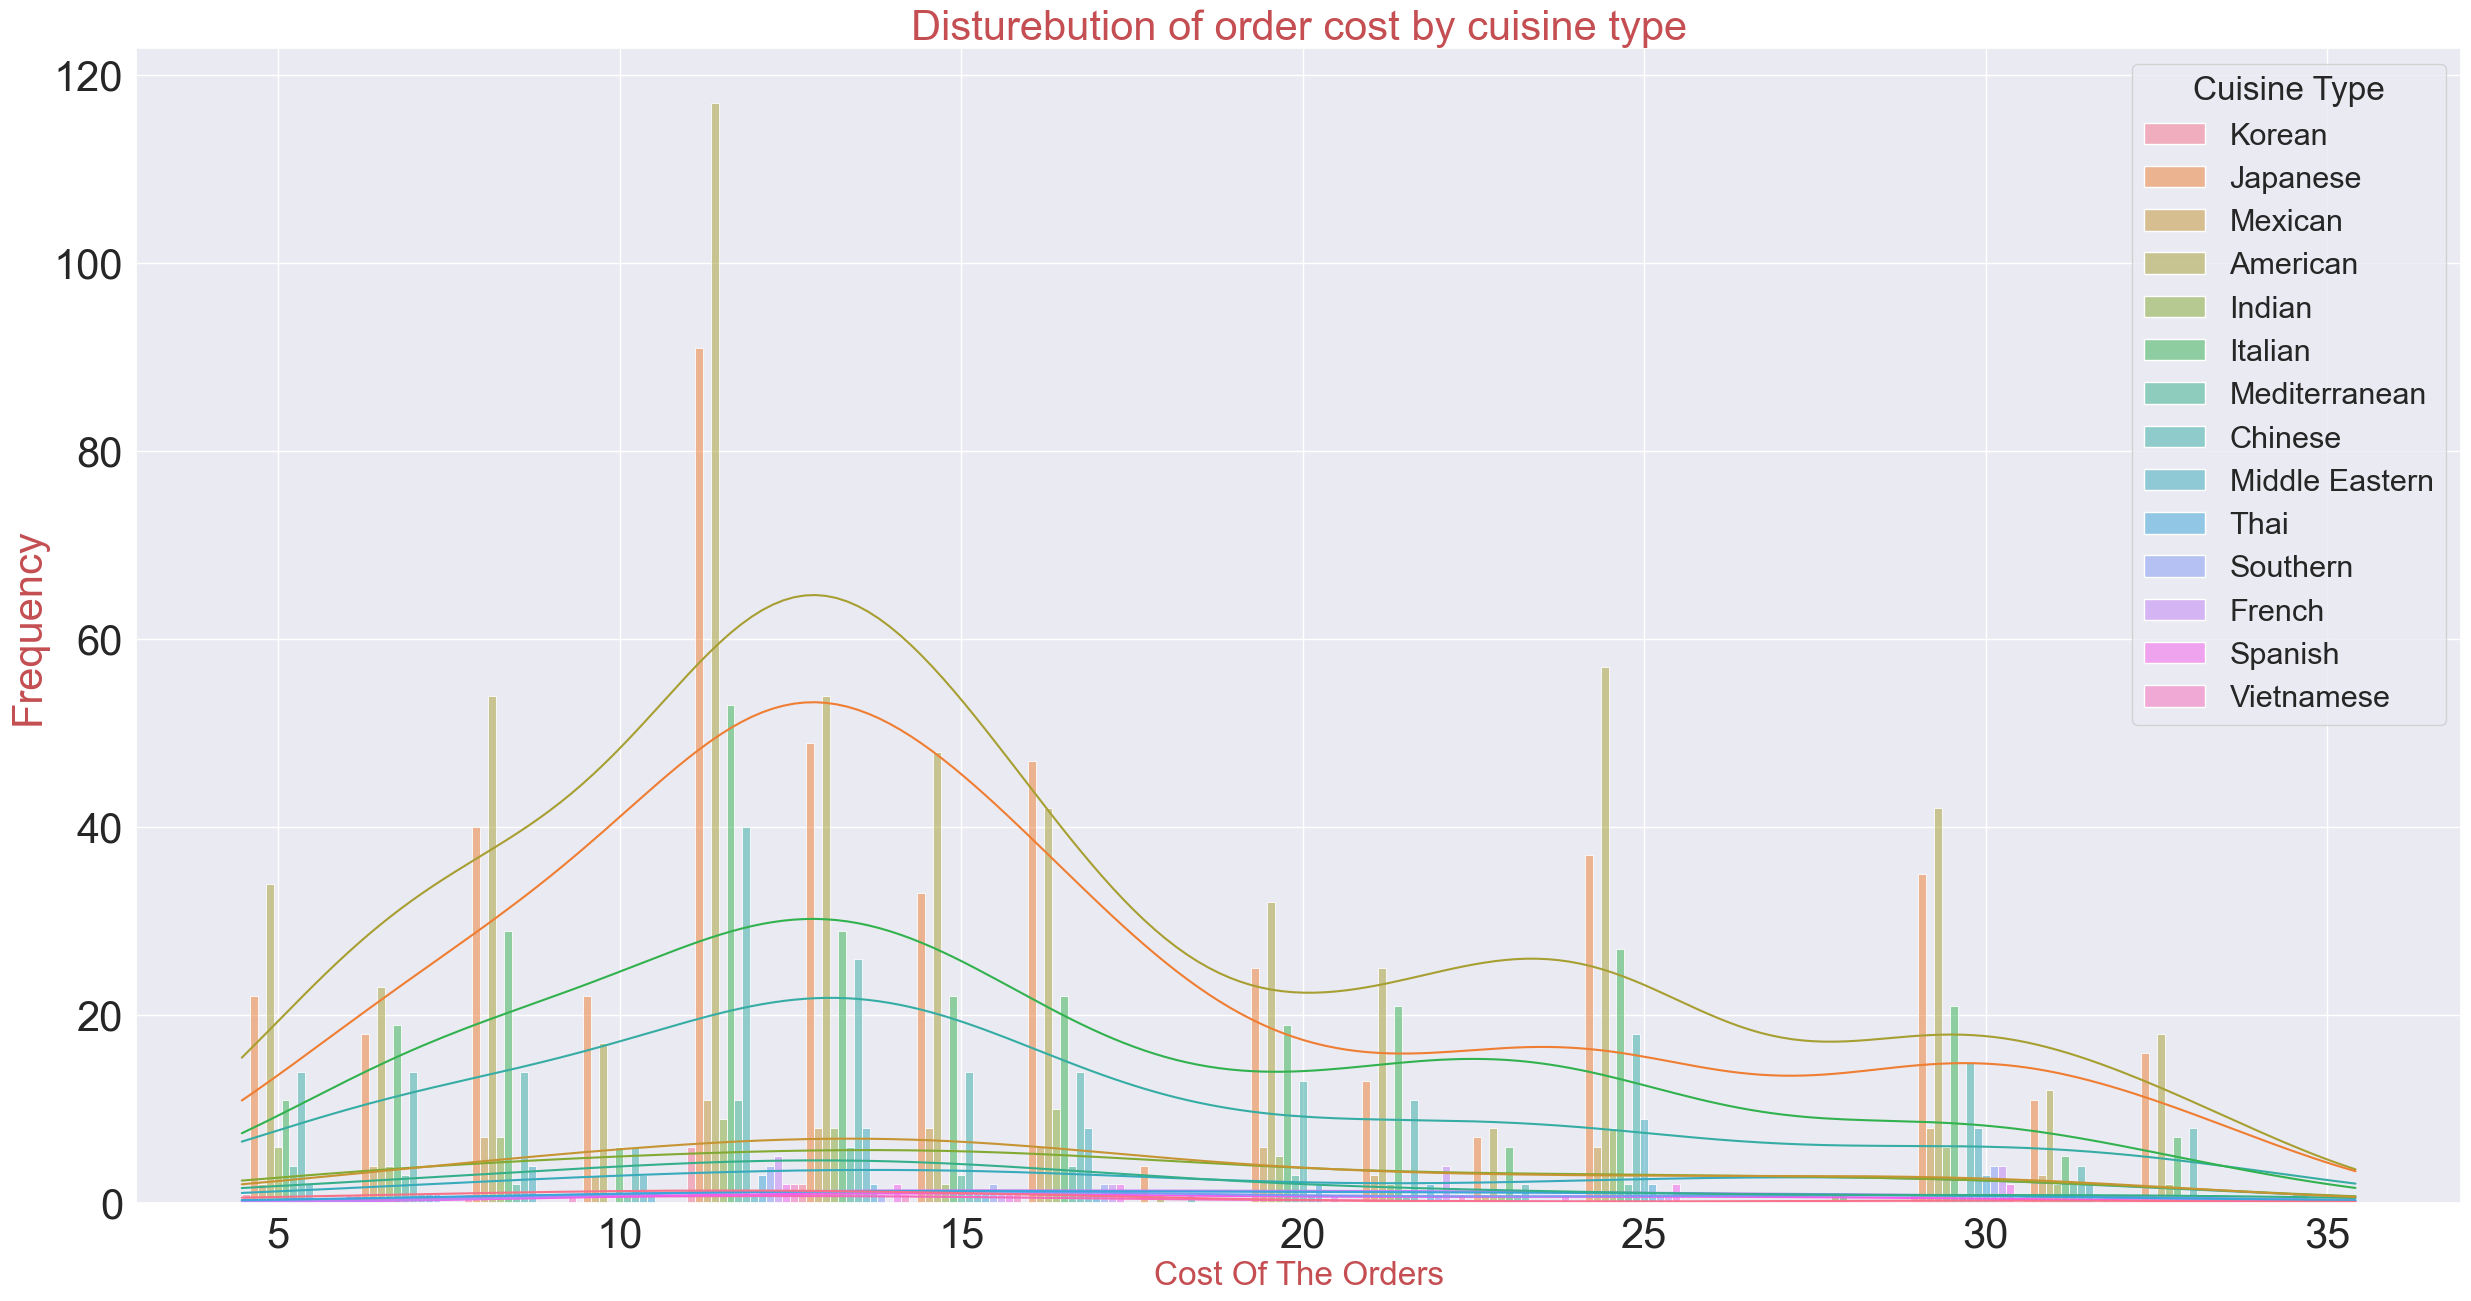

In [397]:
# plot for cost of order based on the cuisine type
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
x=sns.histplot(data=df,x='cost_of_the_order',hue='cuisine_type',kde=True,multiple='dodge')

## Customize the plot (add labels, title, etc.)
plt.title('Disturebution of order cost by cuisine type',fontsize=30, color='r')
plt.xlabel('Cost Of The Orders',color='r')
plt.ylabel('Frequency', fontsize=30,color='r')
x.tick_params(axis='both',labelsize=30)
x.legend_.set_title('Cuisine Type')
plt.show()

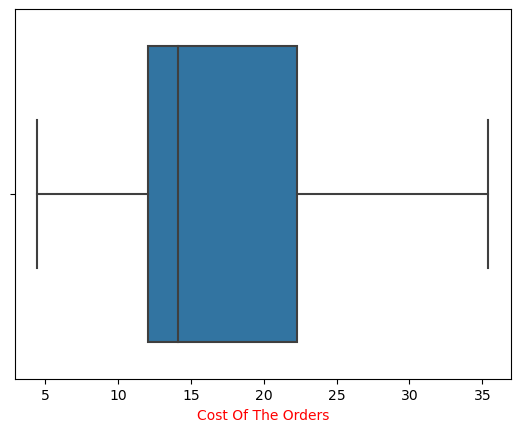

In [202]:
# boxplot for cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.xlabel('Cost Of The Orders',color='r');

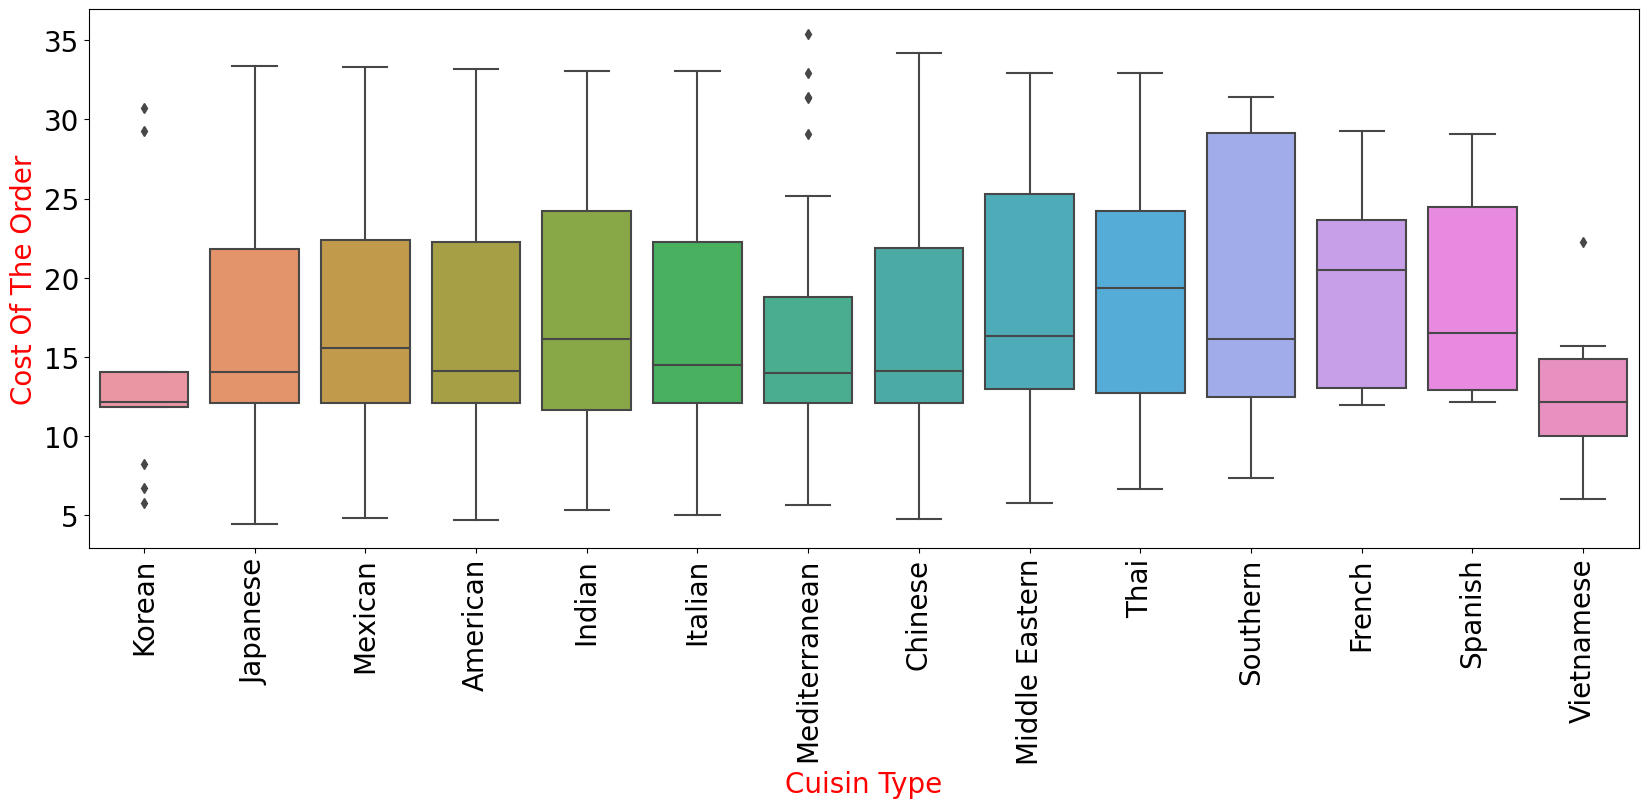

In [206]:
# Boxplot for comparing all cuisine types with order cost
plt.figure(figsize=(20,7))
x=sns.boxplot(data=df,y='cost_of_the_order',x='cuisine_type')

# Customize the plot (add labels, title, etc.)
plt.xticks(rotation=90);
plt.xlabel('Cuisin Type', fontsize=20, color='r')
plt.ylabel('Cost Of The Order', fontsize=20, color='r');
x.tick_params(axis='both',labelsize=20)

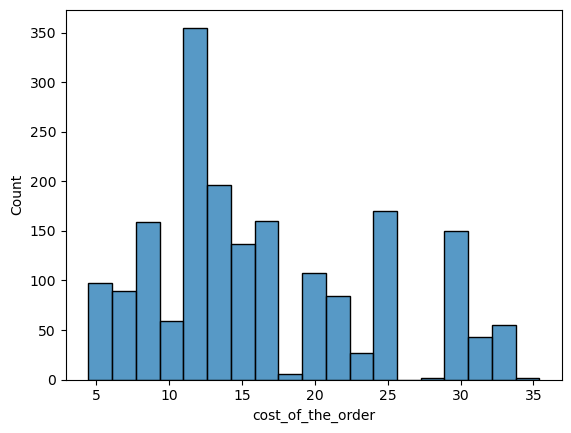

In [142]:
# plot a histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()


# Day of the week

In [84]:
# Unique days  of the week in database
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [85]:
# NUmber of Weekday and Weekend in database
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [344]:
#  percentage of orders on weekdays 
weekday=(547/(1351+547))*100
round(weekday,0)

29.0

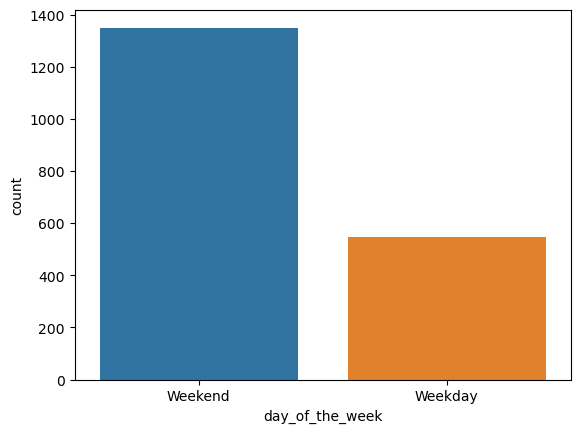

In [145]:
# plot a bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()

#### Day of the week- Delivery Time

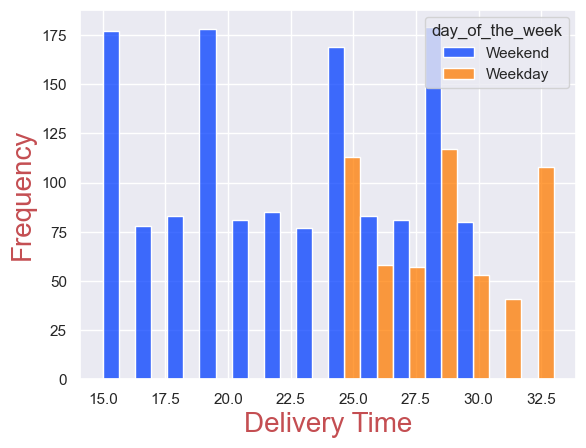

In [51]:
# Histplot for delivery time on weekend and weekday
sns.histplot(data=df,x='delivery_time',hue='day_of_the_week',palette='bright',multiple='dodge')
# Customize the plot (add labels, title, etc.)
plt.xlabel('Delivery Time', color='r', fontsize=20)
plt.ylabel('Frequency', color='r', fontsize=20);

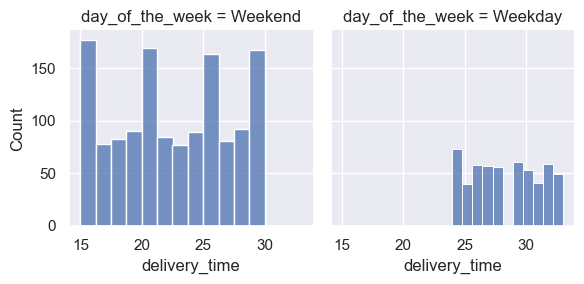

In [53]:
# Histplot for delivery time on weekend and weekday
g=sns.FacetGrid(data=df,col='day_of_the_week')
g.map(sns.histplot,'delivery_time')
plt.tight_layout()

#### Day of the week-Order Cost

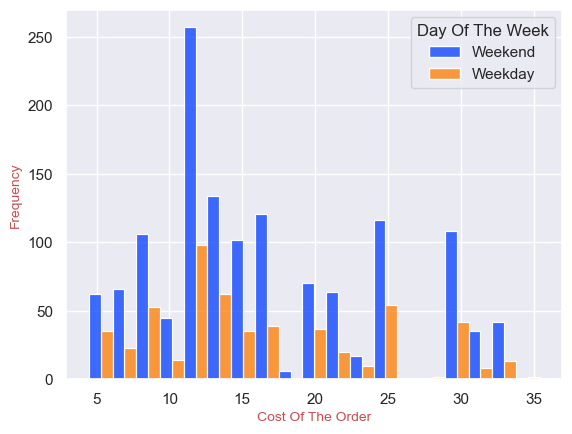

In [392]:
# Disturbution of order cost 
sns.set(font_scale=1)
x=sns.histplot(data=df,x='cost_of_the_order',hue='day_of_the_week',palette='bright',multiple='dodge')
# Customize the plot (add labels, title, etc.)
plt.xlabel('Cost Of The Order', color='r', fontsize=10)
plt.ylabel('Frequency', color='r', fontsize=10);
x.legend_.set_title('Day Of The Week')
    

In [47]:
# Weekday cost array
df_weekday=df[df['day_of_the_week']=='Weekday']['cost_of_the_order'].unique()
np.sort(df_weekday,)

array([ 4.75,  4.9 ,  5.53,  5.67,  5.72,  5.73,  5.77,  5.82,  5.87,
        5.92,  5.97,  6.01,  6.02,  6.06,  6.07,  6.26,  6.4 ,  6.64,
        6.69,  6.74,  6.79,  6.84,  7.03,  7.18,  7.28,  7.33,  7.38,
        7.66,  7.86,  7.91,  7.95,  8.  ,  8.01,  8.05,  8.1 ,  8.2 ,
        8.25,  8.3 ,  8.34,  8.39,  8.49,  8.54,  8.59,  8.63,  8.68,
        8.73,  8.78,  8.83,  8.88,  8.93,  8.97,  9.02,  9.07,  9.12,
        9.17,  9.22,  9.27,  9.41,  9.46,  9.51,  9.6 ,  9.65,  9.75,
       10.14, 10.24, 10.43, 10.72, 10.86, 11.16, 11.3 , 11.59, 11.69,
       11.98, 12.08, 12.13, 12.18, 12.23, 12.27, 12.32, 12.52, 12.56,
       12.61, 12.66, 12.71, 12.9 , 12.95, 13.  , 13.05, 13.1 , 13.19,
       13.48, 13.53, 13.73, 13.87, 13.97, 14.02, 14.07, 14.12, 14.16,
       14.5 , 14.55, 14.6 , 14.65, 14.7 , 14.8 , 14.84, 14.94, 15.13,
       15.18, 15.28, 15.33, 15.38, 15.47, 15.52, 15.57, 15.62, 15.67,
       15.71, 15.76, 15.81, 15.86, 15.91, 15.96, 16.01, 16.05, 16.06,
       16.1 , 16.11,

In [31]:
# Maximume order cost on weekday
max(df_weekday)

35.41

In [32]:
# Minimume order cost on weekday
min(df_weekday)

4.75

In [48]:
# array order cost on weekdend
df_weekend=df[df['day_of_the_week']=='Weekend']['cost_of_the_order'].unique()
np.sort(df_weekend)

array([ 4.47,  4.66,  4.71,  4.75,  4.8 ,  4.85,  5.05,  5.34,  5.48,
        5.58,  5.63,  5.68,  5.72,  5.73,  5.77,  5.82,  5.87,  5.92,
        5.97,  6.01,  6.02,  6.06,  6.07,  6.11,  6.4 ,  6.45,  6.55,
        6.64,  6.69,  6.7 ,  6.74,  6.79,  6.84,  7.08,  7.23,  7.33,
        7.38,  7.61,  7.67,  7.71,  7.81,  7.96,  8.  ,  8.05,  8.1 ,
        8.15,  8.2 ,  8.25,  8.3 ,  8.34,  8.35,  8.39,  8.44,  8.49,
        8.54,  8.59,  8.63,  8.68,  8.73,  8.78,  8.83,  8.88,  8.92,
        8.93,  8.97,  8.98,  9.02,  9.07,  9.12,  9.17,  9.22,  9.26,
        9.27,  9.31,  9.32,  9.41,  9.46,  9.51,  9.55,  9.56,  9.6 ,
        9.61,  9.65,  9.7 ,  9.75,  9.85, 10.14, 10.24, 10.38, 10.82,
       11.11, 11.16, 11.3 , 11.59, 11.64, 11.69, 11.79, 11.83, 11.84,
       11.88, 11.93, 11.98, 12.08, 12.13, 12.17, 12.18, 12.22, 12.23,
       12.27, 12.32, 12.37, 12.42, 12.46, 12.47, 12.51, 12.56, 12.61,
       12.66, 12.71, 12.81, 12.95, 13.  , 13.05, 13.1 , 13.15, 13.19,
       13.24, 13.34,

In [49]:
# Maximume order cost on weekend
max(df_weekend)

33.37

In [50]:
# Minimume order cost on weekdend
min(df_weekday)

4.75

# Rating insights

In [33]:
#  use unique() to find out number of unique in data frame
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [50]:
# counting each unique rating
df['rating'].value_counts().reset_index()

,rating,count
0,Not given,736
1,5,588
2,4,386
3,3,188


In [346]:
# Percentage of not given rating
round(736/(736+588+386+188)*100,0)

39.0

In [169]:
# new copy of datatframe
df_0=df.copy()

In [170]:
# repalce Not given to nan
df_0.replace('Not given',np.nan,inplace=True)

In [172]:
# conting the rating without Not given
df_0['rating'].value_counts().reset_index()

,rating,count
0,5,588
1,4,386
2,3,188


In [181]:
# Counting  rating with Not given 
df['rating'].value_counts().reset_index()

,rating,count
0,Not given,736
1,5,588
2,4,386
3,3,188


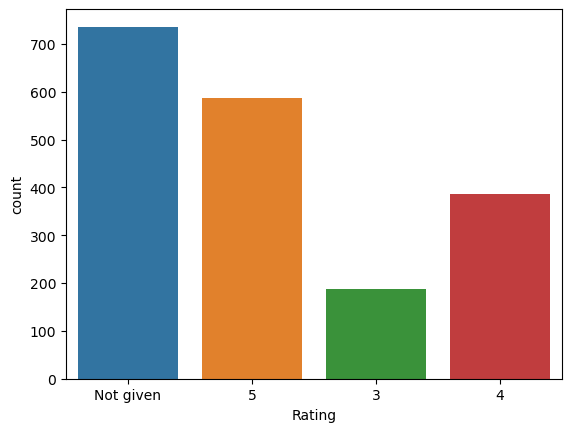

In [179]:
# PLot the number of unique rating rating 
sns.countplot(data=df,x='rating')
plt.xlabel('Rating')
plt.show()

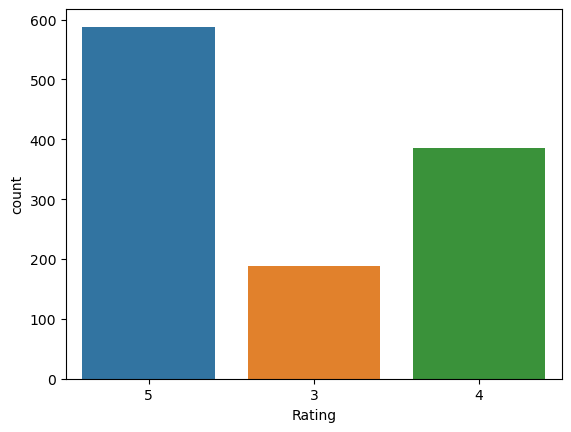

In [180]:
sns.countplot(data=df_0,x='rating')
plt.xlabel('Rating')
plt.show()

In [182]:
# 5 most rated restaurant
df_0.groupby('restaurant_name')['rating'].value_counts().reset_index().sort_values(by='count',ascending=False).head()

,restaurant_name,rating,count
208,Shake Shack,5,60
237,The Meatball Shop,5,53
209,Shake Shack,4,50
29,Blue Ribbon Sushi,5,32
26,Blue Ribbon Fried Chicken,5,32


In [183]:
# 5 most rated cuisine type
df_0.groupby('cuisine_type')['rating'].value_counts().reset_index().sort_values(by='count',ascending=False).head()

,cuisine_type,rating,count
0,American,5,174
15,Japanese,5,142
1,American,4,130
16,Japanese,4,91
12,Italian,5,90


In [184]:
# Top rated restaurant
df_2=df_0.groupby(df['restaurant_name'])[['rating']].value_counts().reset_index()
df_2[(df_2['count']>=50)  ].sort_values(by='count',ascending=False)

,restaurant_name,rating,count
208,Shake Shack,5,60
237,The Meatball Shop,5,53
209,Shake Shack,4,50


## Food Prepration Time

In [88]:
# Average of food prepration time
round(df['food_preparation_time'].mean(),2)

27.37

In [185]:
# Total food prepration time
df['food_preparation_time'].sum()

51952

In [191]:
# Maximume food preparation time 
df['food_preparation_time'].max()

35

In [197]:
# Description of food preparation time 
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [324]:
# comparing the food preparation time and delivery time for each restaurant
df.groupby(['restaurant_name','day_of_the_week'])[['food_preparation_time','delivery_time']].mean()

food_preparation_time  delivery_time
restaurant_name  day_of_the_week                                      
'wichcraft       Weekday                      28.000000      28.000000
12 Chairs        Weekday                      27.500000      29.000000
                 Weekend                      26.500000      26.500000
5 Napkin Burger  Weekday                      32.000000      25.000000
                 Weekend                      29.000000      24.000000
...                                                 ...            ...
da Umberto       Weekday                      20.000000      30.000000
                 Weekend                      26.500000      27.000000
ilili Restaurant Weekday                      27.111111      28.555556
                 Weekend                      25.666667      21.222222
indikitch        Weekend                      30.750000      25.500000

[280 rows x 2 columns]

In [321]:
# comparing the food preparation time and delivery time for each restaurant
df.groupby(['restaurant_name','day_of_the_week'])[['food_preparation_time','delivery_time']].mean().reset_index().sort_values('food_preparation_time',ascending=False)

,restaurant_name,day_of_the_week,food_preparation_time,delivery_time
107,Hatsuhana,Weekday,35.0,33.0
228,Taro Sushi,Weekday,35.0,32.0
213,Sushi Choshi,Weekend,35.0,27.0
66,Cipriani Le Specialita,Weekend,35.0,30.0
132,Klong,Weekend,35.0,24.0
...,...,...,...,...
275,da Umberto,Weekday,20.0,30.0
106,Haru Gramercy Park,Weekday,20.0,32.0
201,Sarabeth's Restaurant,Weekday,20.0,28.5
248,V-Nam Cafe,Weekday,20.0,31.0


In [316]:
# comparing the food preparation time and delivery time for each restaurant
df.groupby(['restaurant_name','day_of_the_week'])[['food_preparation_time','delivery_time']].count().reset_index().sort_values('food_preparation_time',ascending=False)

,restaurant_name,day_of_the_week,food_preparation_time,delivery_time
209,Shake Shack,Weekend,145,145
236,The Meatball Shop,Weekend,95,95
35,Blue Ribbon Sushi,Weekend,85,85
208,Shake Shack,Weekday,74,74
33,Blue Ribbon Fried Chicken,Weekend,74,74
...,...,...,...,...
190,Room Service,Weekday,1,1
189,Rohm Thai,Weekend,1,1
102,Hampton Chutney Co.,Weekend,1,1
106,Haru Gramercy Park,Weekday,1,1


In [186]:
# comparing the food preparation time and delivery time for each restaurant
df.groupby(['restaurant_name','day_of_the_week'])[['food_preparation_time','delivery_time']].value_counts().reset_index().sort_values('food_preparation_time',ascending=False)

,restaurant_name,day_of_the_week,food_preparation_time,delivery_time,count
1759,indikitch,Weekend,35,30,1
1236,Shake Shack,Weekend,35,17,1
1210,Shake Shack,Weekend,35,29,2
211,Blue Ribbon Sushi,Weekend,35,16,2
212,Blue Ribbon Sushi,Weekend,35,18,2
...,...,...,...,...,...
885,Parm,Weekend,20,19,1
1419,TAO,Weekend,20,27,1
416,CafÌ© China,Weekend,20,23,1
1651,Vanessa's Dumpling House,Weekend,20,23,1


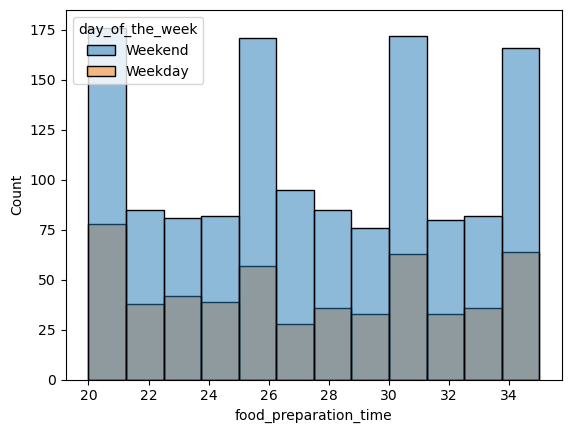

In [187]:
# Plot food preparation time and day of the week
sns.histplot(data=df, x='food_preparation_time',hue='day_of_the_week')
plt.show()

In [203]:
# Description for weekday and weekend
df.groupby(df['day_of_the_week'])['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,27.212066,4.708616,20.0,23.0,27.0,31.0,35.0
Weekend,1351.0,27.436714,4.601476,20.0,23.0,27.0,31.0,35.0


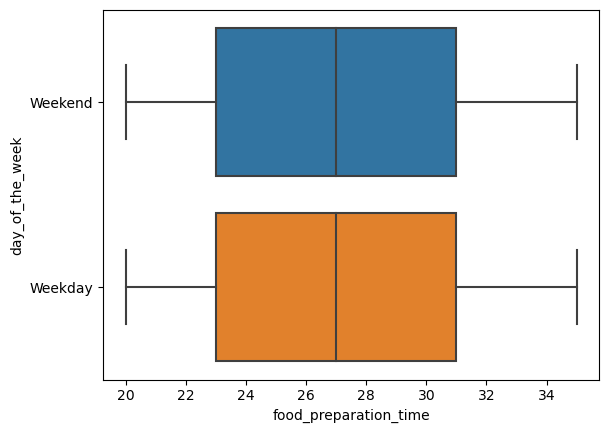

In [190]:
# Boxplot  for food preparation time and day of the week
sns.boxplot(data=df,x='food_preparation_time',y='day_of_the_week')
plt.show()

In [14]:
# Minimume food preparation time
df.groupby(df['day_of_the_week'])['food_preparation_time'].min()

day_of_the_week
Weekday    20
Weekend    20
Name: food_preparation_time, dtype: int64

In [59]:
# Maximume  food preparation time
df.groupby(df['day_of_the_week'])['food_preparation_time'].max()

day_of_the_week
Weekday    35
Weekend    35
Name: food_preparation_time, dtype: int64

In [90]:
# Average food preparation time
df.groupby(df['day_of_the_week'])['food_preparation_time'].mean()

day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64

In [202]:
# Food prepration time description
df.groupby(df['day_of_the_week'])['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,27.212066,4.708616,20.0,23.0,27.0,31.0,35.0
Weekend,1351.0,27.436714,4.601476,20.0,23.0,27.0,31.0,35.0


# Delivery Time

In [207]:
# Average of delivery time
round(df['delivery_time'].mean(),2)

24.16

In [204]:
# Description of delivery time
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Delivery Time and Restaurant Name

In [97]:
# Average delivery time for each restaurant
df.groupby(['restaurant_name'])['delivery_time'].mean().reset_index().sort_values('delivery_time',ascending=False)

,restaurant_name,delivery_time
132,Sarabeth's West,33.0
148,Taro Sushi,32.0
68,Haru Gramercy Park,32.0
58,Frank Restaurant,31.0
64,Haandi,30.5
...,...,...
61,Galli Restaurant,16.0
152,The MasalaWala,15.0
110,Paul & Jimmy's,15.0
71,Hibino,15.0


 #### Delivery Time and Day Of The Week

Text(0, 0.5, 'Ferequenty')

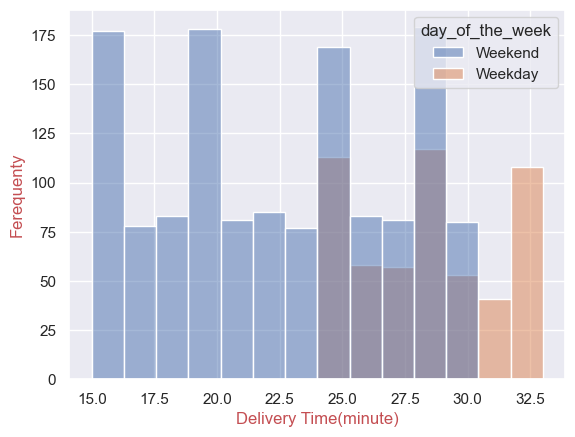

In [57]:
#Plot for delivery Time on weekday and weekend
sns.histplot(data=df, x='delivery_time',hue='day_of_the_week')
plt.xlabel('Delivery Time(minute)',color='r')
plt.ylabel('Ferequenty',color='r')

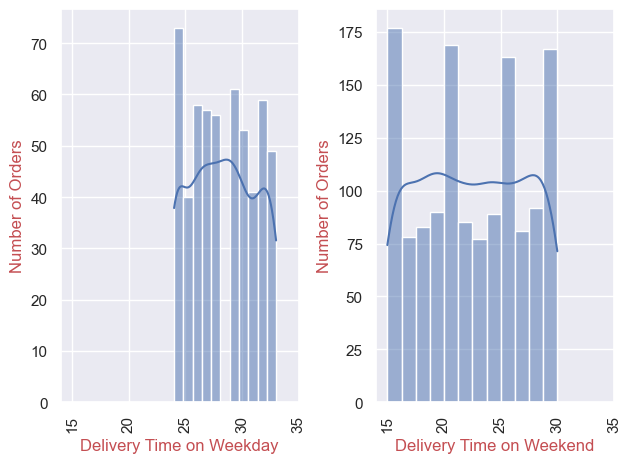

In [377]:
#Plot for delivery Time on weekday and weekend
plt.subplot(1,2,1)
df5=df[df['day_of_the_week']=='Weekday']
sns.histplot(data=df5,x='delivery_time',kde=True)
plt.xticks(rotation=90)
plt.xlabel('Delivery Time on Weekday',color='r')
plt.ylabel('Number of Orders',color='r')
plt.xlim(14,35)

plt.subplot(1,2,2)
df7=df[df['day_of_the_week']=='Weekend']
sns.histplot(data=df7,x='delivery_time',kde=True)
plt.xticks(rotation=90)
plt.xlabel('Delivery Time on Weekend',color='r')
plt.ylabel('Number of Orders',color='r')
plt.xlim(14,35)

plt.tight_layout()
plt.show()

In [347]:
# Total delivery time on weekend and weekday
df.groupby(df['day_of_the_week'])['delivery_time'].sum()

day_of_the_week
Weekday    15502
Weekend    30357
Name: delivery_time, dtype: int64

In [350]:
# Percentage of total delivery time on weekday
weekday_time=round((15502/(15502+30357))*100,0)
weekday_time

34.0

In [11]:
#  Minimume of Delivery Time on The Week
df.groupby(df['day_of_the_week'])['delivery_time'].min()

day_of_the_week
Weekday    24
Weekend    15
Name: delivery_time, dtype: int64

In [58]:
 # Maximume of Delivery Time on  The Week
df.groupby(df['day_of_the_week'])['delivery_time'].max()

day_of_the_week
Weekday    33
Weekend    30
Name: delivery_time, dtype: int64

In [92]:
# Average of Delivery Time on  The Week
round(df.groupby(df['day_of_the_week'])['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

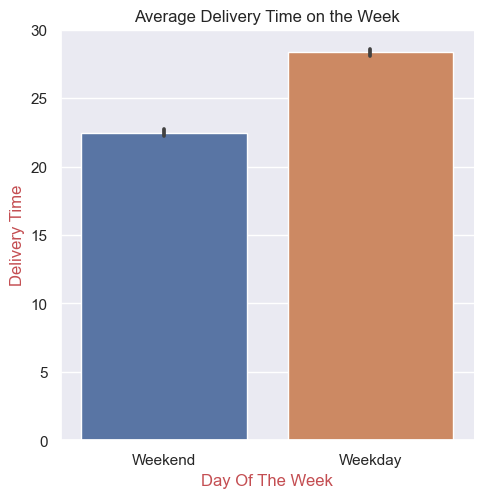

In [352]:
# Plot for  avearge delivery time on week and weekend
sns.catplot(data=df,x='day_of_the_week', y='delivery_time',kind='bar',)
# define plot paramitter
plt.xlabel('Day Of The Week',color='r')
plt.ylabel('Delivery Time',color='r');
plt.title('Average Delivery Time on the Week')
plt.show()

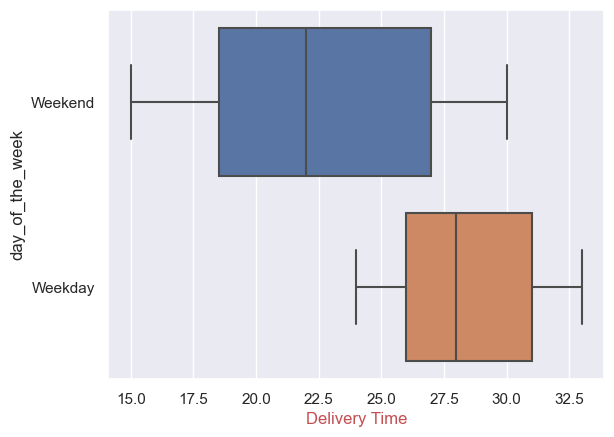

In [328]:
# BoxpLot for deliver time on Weekday and Weekend
sns.boxplot(data=df, x='delivery_time',y='day_of_the_week')
plt.xlabel('Delivery Time', color='r')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [96]:
# Top 5 restaurant in terms of number of order
top_restaurant=df.groupby(['restaurant_name'])[['order_id']].nunique().reset_index()
top_restaurant.sort_values(by='order_id', ascending=False).head()

,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:
- Shake Shack is  the topest resurant with 219 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [133]:
# 5 top most popular cuisine on weekend
df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts().head()


cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

In [98]:
# topest cuisine type on weekend
df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
American cuisine type is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [60]:
# percentage of the orders cost more than 20 dollars
df2=df[df['cost_of_the_order']>20].count()
np.round((df2['cost_of_the_order']/df.shape[0])*100, 2)

29.24

In [61]:
# percentage of the orders cost more than 20 dollars
np.round((df['cost_of_the_order']>20).mean()*100,2)


29.24

#### Observations:
- About 29.24% of the order is cost more than %20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [99]:
# Round of the mean order delivery time
round((df['delivery_time']).mean(),2)

24.16

#### Observations:
- The average delivery time is 24.16 minuts

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [100]:
# The top 3 most frequent customers

df['customer_id'].value_counts().head(3).reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:

- customer id 52832	 has 13 orders
- customer id 47440	 has 10 orders
- customer id  83287 has 9  orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Dlivery Time and Order Cost

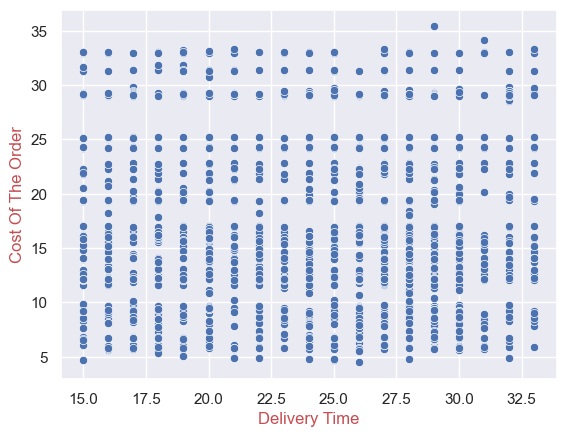

In [102]:
# Relationships between delivery time and order cost
sns.scatterplot(data=df,x='delivery_time', y='cost_of_the_order')
plt.xlabel('Delivery Time',color='r')
plt.ylabel('Cost Of The Order', color='r');

#### Dlivery Time and Food Prepration Time

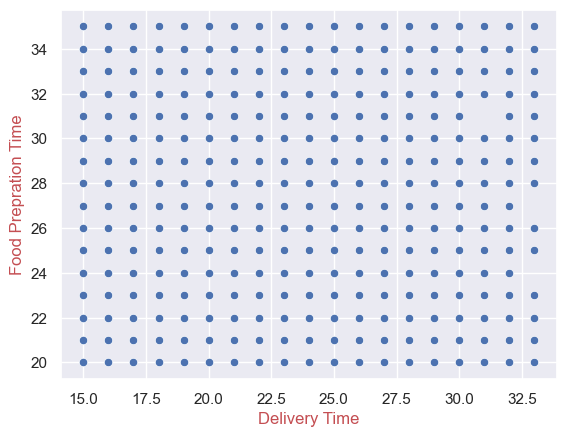

In [103]:
# Relationships between delivery time and food preparation time
sns.scatterplot(data=df,x='delivery_time', y='food_preparation_time')
plt.xlabel('Delivery Time',color='r')
plt.ylabel('Food Prepration Time', color='r');

#### Paire Plot

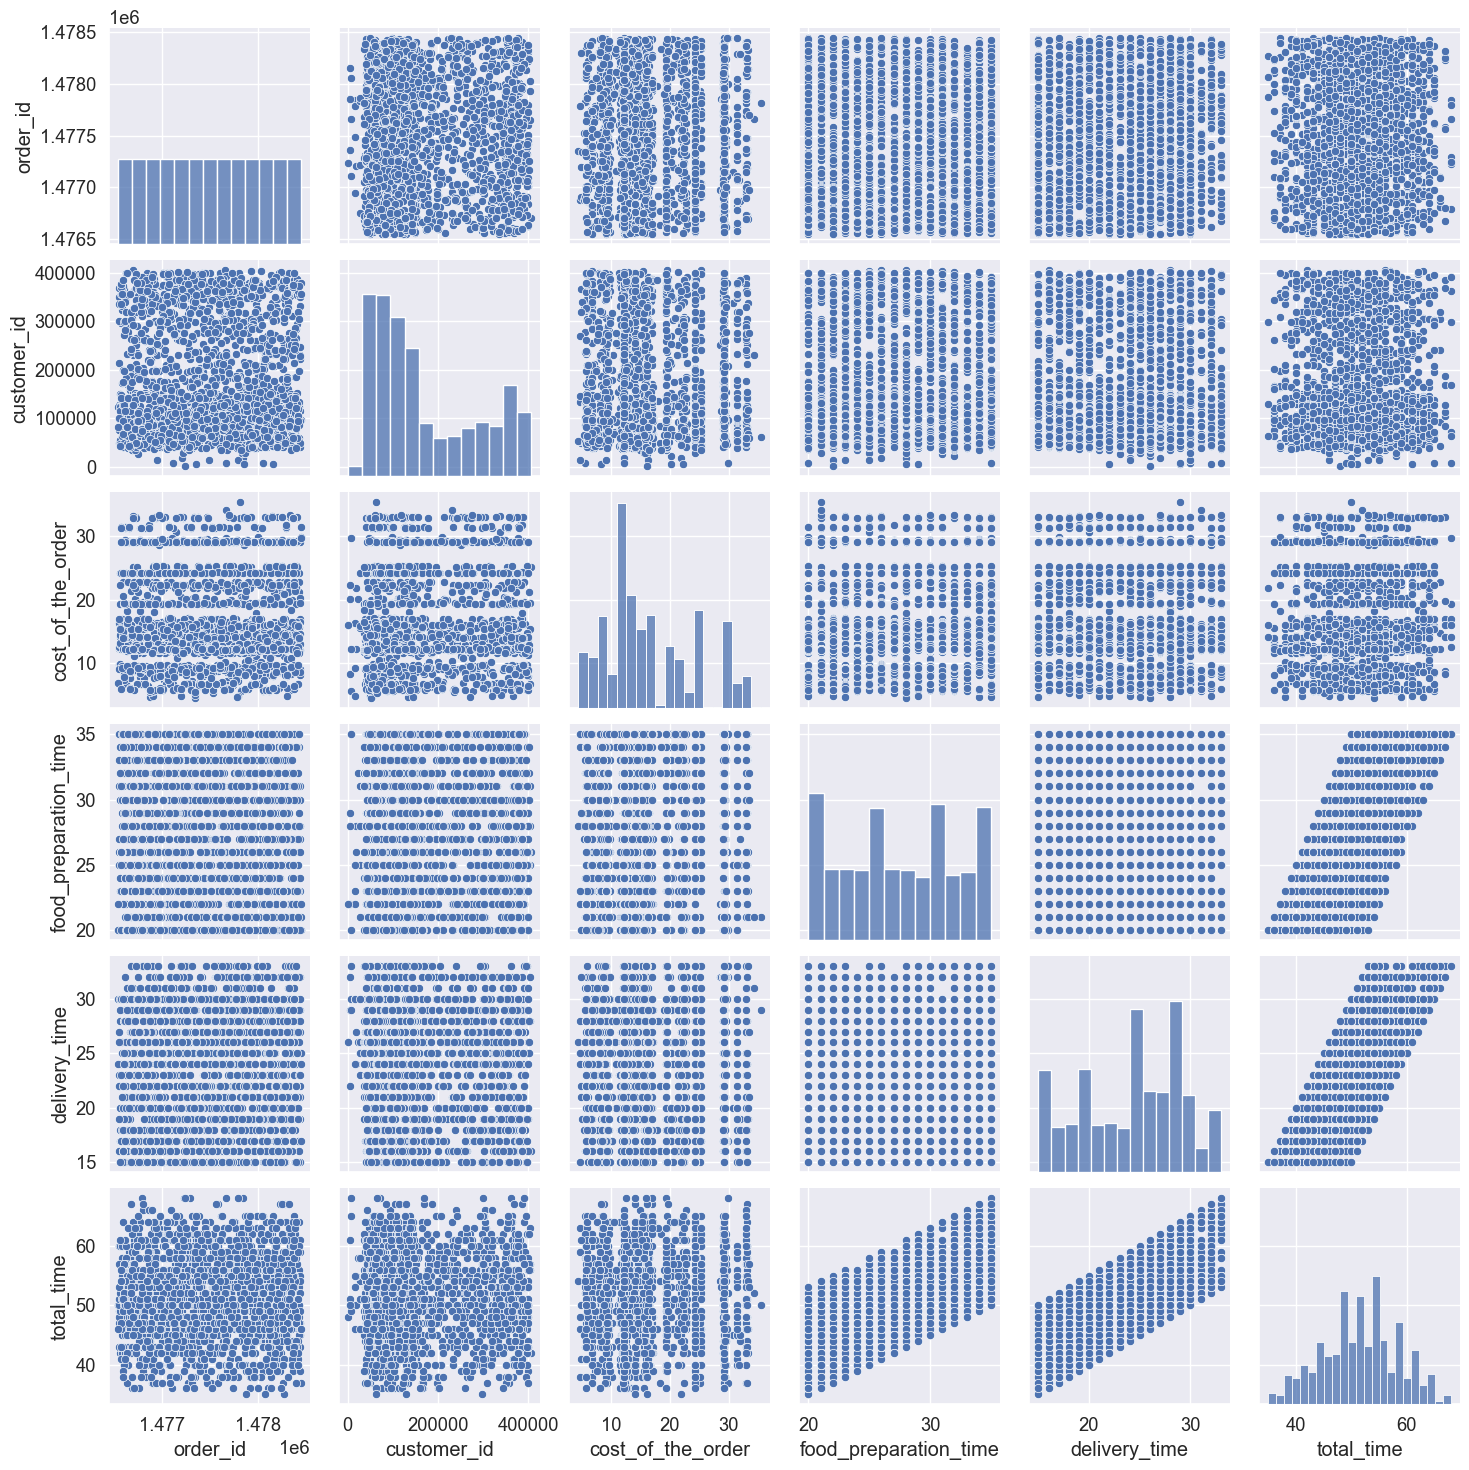

In [306]:
# Plot to show the relatioship between numerical variable 
sns.set(font_scale=1.2)
sns.pairplot(data=df)
plt.show()

#### Correlatinship between Restaurant Name, Cuisine Type, Day Of The Week, Rating

<Axes: >

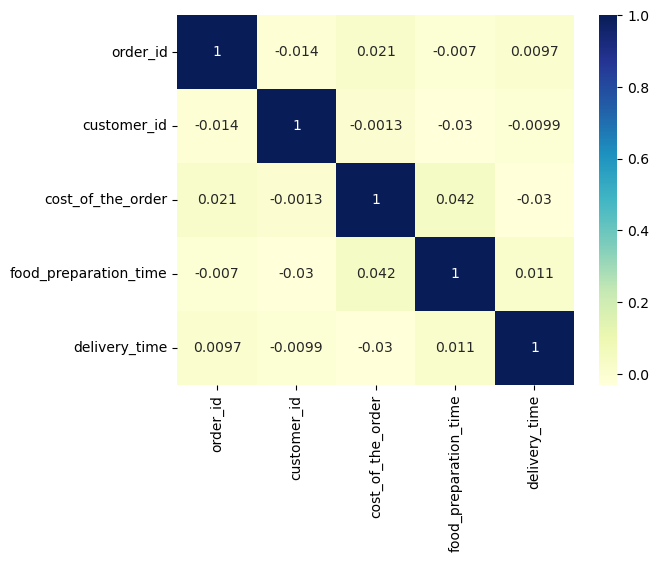

In [209]:
# Heatmam plot  to see correlation between variable
column_to_drop=['restaurant_name','cuisine_type','day_of_the_week','rating']
df_num=df.drop(column_to_drop,axis=1)
df_num_corr=df_num.corr()  
sns.heatmap(df_num_corr,annot=True, cmap='YlGnBu')

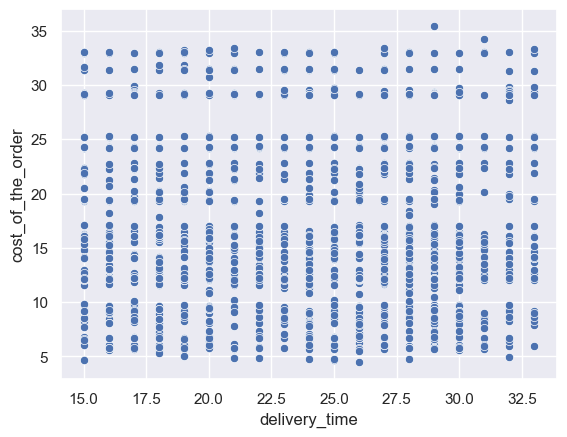

In [305]:
# Relationship between delivery time and order cost
sns.scatterplot(data=df, x='delivery_time', y='cost_of_the_order')
plt.show()

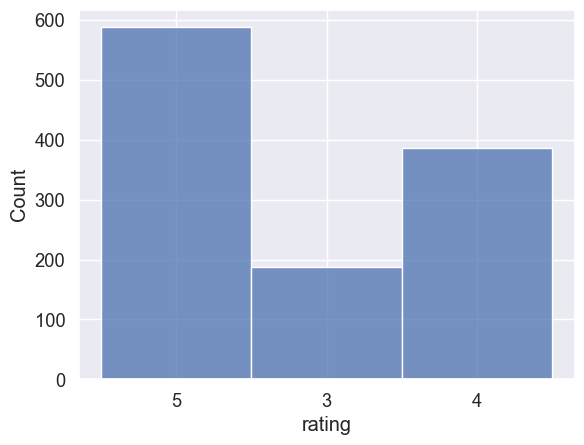

In [308]:
# Histplot for rating
df_0=df.copy()
df_0.replace('Not given',np.nan,inplace=True)
sns.histplot(data=df_0,x='rating')
plt.show()

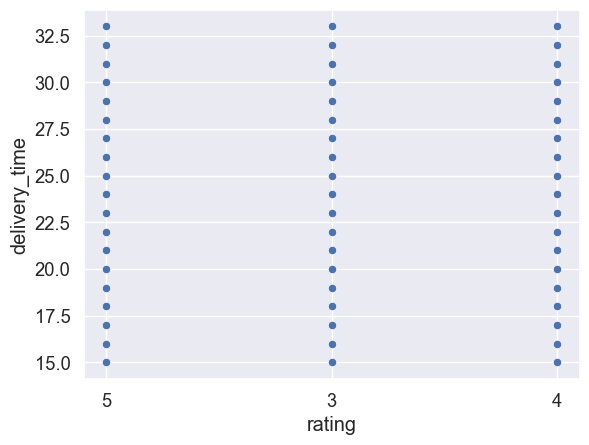

In [309]:
# Scatter plot to see relationship between rating and delivery time
sns.scatterplot(data=df_0,x='rating',y='delivery_time')
plt.show()

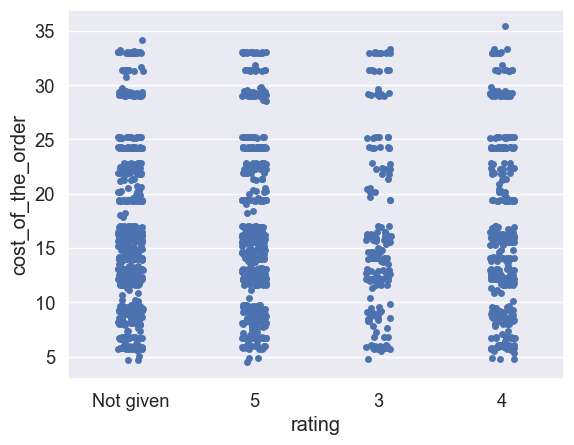

In [310]:
# Strip plot to see relationship between rating and order cost
sns.stripplot(data=df,x='rating',y='cost_of_the_order')
plt.show()

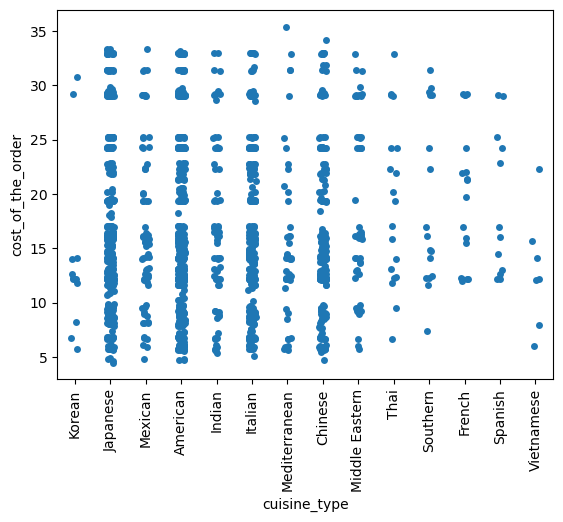

In [78]:
# Strip plot to see relationship between cuisine type and order cost
sns.stripplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90);

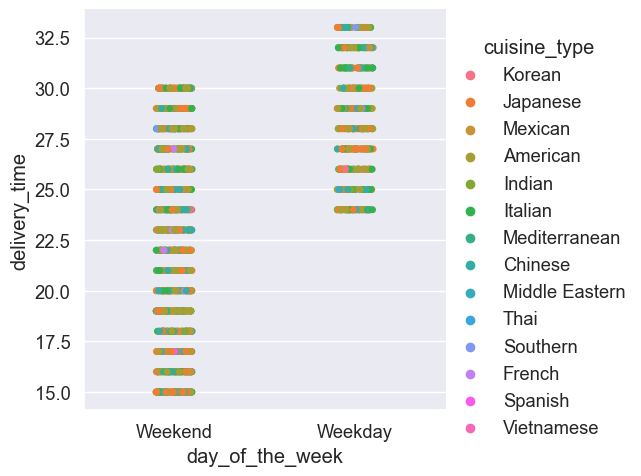

In [311]:
# Catigory plot to see relationship between day of the week and and delivery time
sns.catplot(data=df,x='day_of_the_week',y='delivery_time',hue='cuisine_type')
plt.show()

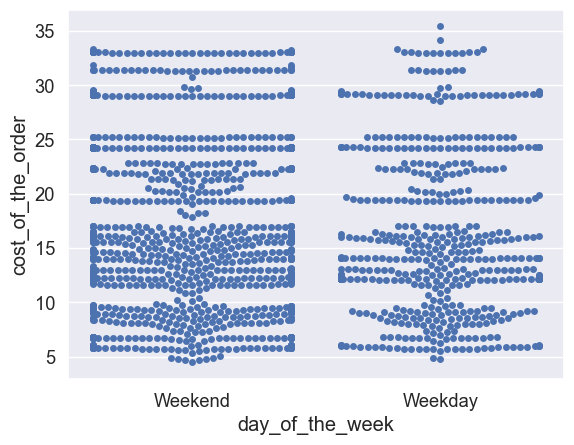

In [312]:
# Swarm plot to see relationship between day of the week and order cost
sns.swarmplot(data=df,x='day_of_the_week', y='cost_of_the_order')
plt.show()

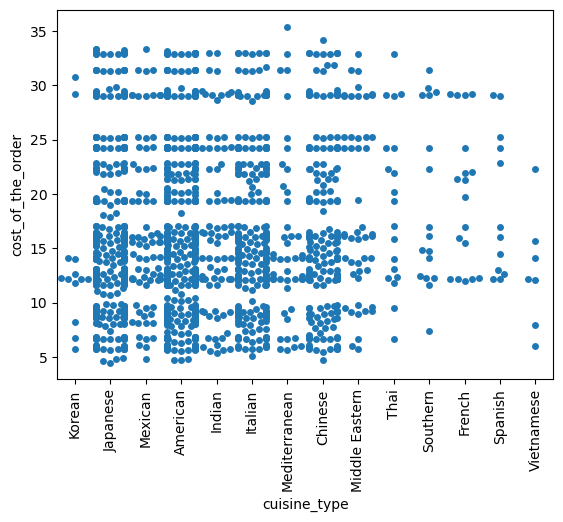

In [89]:
# Swarm plot to see relationship between cuisine type and order cost
sns.swarmplot(data=df,x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);


In [92]:
# Cuisine type list
cuisine1=df['cuisine_type'].unique()
cuisine1

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [120]:
# Average cuisine type on week and weekend
df.groupby(['cuisine_type','day_of_the_week'])[['cost_of_the_order']].mean()


cost_of_the_order
cuisine_type   day_of_the_week                   
American       Weekday                  15.308343
               Weekend                  16.731735
Chinese        Weekday                  17.147692
               Weekend                  16.036442
French         Weekday                  20.866000
               Weekend                  19.381538
Indian         Weekday                  17.162500
               Weekend                  16.800816
Italian        Weekday                  16.890110
               Weekend                  16.211449
Japanese       Weekday                  16.368074
               Weekend                  16.278925
Korean         Weekday                  12.180000
               Weekend                  14.332727
Mediterranean  Weekday                  14.040000
               Weekend                  16.102500
Mexican        Weekday                  16.555833
               Weekend                  17.103962
Middle Eastern Weekday                  19.832941
               Weekend                  18.282812
Southern       Weekday                  19.226667
               Weekend                  19.340909
Spanish        Weekday                  12.130000
               Weekend                  19.618182
Thai           Weekday                  15.462500
               Weekend                  20.206667
Vietnamese     Weekday                  11.916667
               Weekend                  13.607500

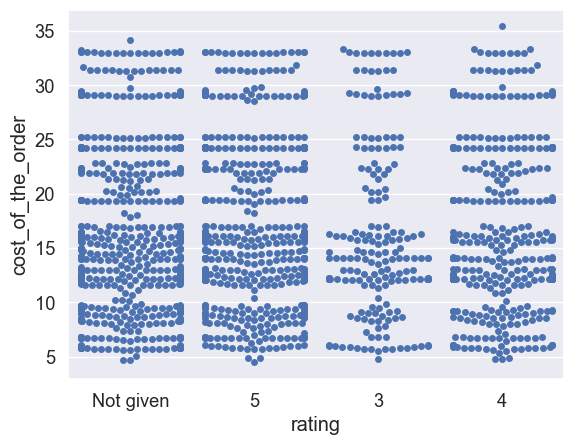

In [326]:
# Swarm plot for rating and order cost
sns.swarmplot(data=df,x='rating', y='cost_of_the_order');
plt.show()

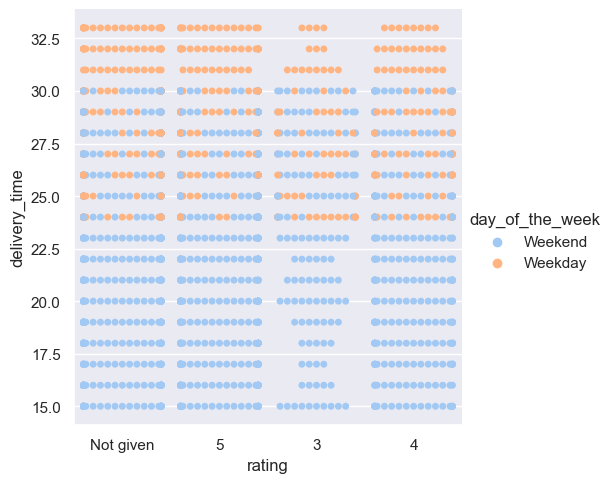

<Figure size 1700x2000 with 0 Axes>

In [327]:
# Catigory plot for ratin and delivery time
sns.set(font_scale=1)
sns.catplot(data=df, x="rating", y="delivery_time", hue="day_of_the_week",  kind='swarm', palette='pastel');
plt.figure(figsize=(17,20))
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [224]:
#Creat new dataset
df_n=df.copy()
# replace Not given value to 1
df_n['rating'].replace('Not given',1,inplace=True)


In [226]:
# Convert object type to intiger type
df_n['rating']=df_n['rating'].astype('int64')


In [228]:
# Replacing 1 with nan in rating column
df_n['rating'].replace(1,np.nan,inplace=True)

In [301]:
# Finding  the avrage  of rating that are more than 4
df_n1=df_n.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()

df_n1[df_n1.rating>=4]

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
134,Pongsri Thai,4.0
135,Frank Restaurant,4.0
136,Dirty Bird to Go,4.0
137,Rye House,4.0


In [298]:
#  top restaruant that got more rating number
df_top=df_n.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()
df_top[df_top['rating']>50].sort_values('rating',ascending=False)


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [230]:
# Averag rating for Shake Shack
df1=df_n1[df_n1['restaurant_name']=='Shake Shack']['rating'].mean()
round(df1,2)

4.28

In [231]:
# Averag rating for The Meatball Shop
df2=df_n1[df_n1['restaurant_name']=='The Meatball Shop']['rating'].mean()
round(df2,2)

4.51

In [232]:
# Averag rating for Blue Ribbon Sushi
df3=df_n1[df_n1['restaurant_name']=='Blue Ribbon Sushi']['rating'].mean()
round(df3,2)

4.22

In [233]:
# Averag rating for Blue Ribbon Fried Chicken
df4=df_n1[df_n1['restaurant_name']=='Blue Ribbon Fried Chicken']['rating'].mean()
round(df4,2)

4.33

#### Observations:
the restaurants tat have a rating count of more than 50 and the average rating should be greater than 4 are:
1-Shake Shack
2-The Meatball Shop
3-Blue Ribbon Sushi
4-Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [244]:
# Write the code here
# cost between $5 to $20
df_5to20=df[(df['cost_of_the_order']<20) & (df['cost_of_the_order']>5)]
# cost more than $20
df_20up=df[df['cost_of_the_order']>=20]
# calculate the total revenue
df_revenue=df_5to20['cost_of_the_order']*.25 +df_5to20['cost_of_the_order']*.15
print('The net revenue generated= ',df_revenue.sum())


The net revenue generated=  6606.868


#### Observations:
- The net revenue is arount $6606.868

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [245]:
# Calculation of Total delivery Time 
df2=df.copy()
df2['total_delivery_time']=df2['delivery_time']+df2['food_preparation_time']


In [282]:
# Lenght of all delivery time that more than 60
len1=len(df2[df2['total_delivery_time']>60])
print(len1)

200


In [283]:
# Lenght of all delivery time
len2=len(df2['total_delivery_time'])
print(len2)

1898


In [284]:
# Percentage of total delivery time more than 60 min
percentage=(len1/len2)*100
round(percentage,2)

10.54

#### Observations:
only 10.54 % of orders take more than 60 minuts 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [253]:
# Average delivery time on weekday 
time_weekday=df[df.day_of_the_week=='Weekday'].delivery_time.mean()
round(time_weekday,2)

28.34

In [254]:
# Average  delivery time on weekend 
time_weekend=df[df.day_of_the_week=='Weekend'].delivery_time.mean()
round(time_weekend,2)

22.47

In [257]:
# diference of delivery time
time_diff=time_weekday-time_weekend
print(round(time_diff,2),' Minuts')

5.87  Minuts


In [263]:
# percentage of delivery time difrence
time_percentage=(time_diff/(time_weekend))*100
time_percentage=round(time_percentage,2)
print(time_percentage,' %')

26.12  %


#### Observations:
time of delivery on weekday is around 6 minuts more than weekend that is about 26% more

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1-As we can see on  heatplot there is no relation between numaric values in dataframe

2-Customer Id 52832 has a bigest cost order of % 225.80  for 13 order

3-Restaurent Sarabeth's West	 has the highest average delivery time of 33.0 minuts 

4-Restaurant Gaia Italian Cafe has the lowest average delivery time of 15.0 minuts

5-Restaurent Shake Shack	has highest request order of 219 times from 170 customer id

6-The cuisine types are :'Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
 'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern','French', 'Spanish', 'Vietnamese'
 
7-The cuisine type American has the highest request of 584 times

8-29% of order cost come from weekdays

9-71% of order cost come from weekend

10-39% of orders not rated

11-Restarant Shake Shack got rated 5 for 60 times 

12-Cuisine type American got rated	5 for 174 times

13-Restaurant Sarabeth's West got highest  delivery time of	33.0 minuts

14-Restaurant Gaia Italian Cafe got lowest delivery time of	15.0 minuts 

15-The number of drivers available to deliver orders afected by high weekend request,so the delivery times  increase by 26%


### Recommendations:
1:As increesing delivery time on weekdend I recomanded to do this to decrease delivery time on weekend

A- encourage driver to work on weekday by give them some promotion

B- Charge more for delivery from the restaurant on weekends compared to weekdays.

C- Give the promotion to customer who requset delivery on weekday

D- Put more delivery service for rush over time 

E- Increase on call drivers on weekend

2: encourage customers to rate their serveces to increase the number of feedback from customers


  

---